<a href="https://colab.research.google.com/github/RajeshworM/Machine_Learning/blob/main/GT_Night_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 2: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
file_path = '/content/drive/My Drive/assignment_raj1.csv'  # Update the path as necessary
data = pd.read_csv(file_path)

In [16]:
# Step 4: Drop unwanted columns
columns_to_exclude = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
filtered_data = data.drop(columns=columns_to_exclude, errors='ignore')

In [17]:
# Step 5: Compute correlations
correlation_matrix = filtered_data.corr()

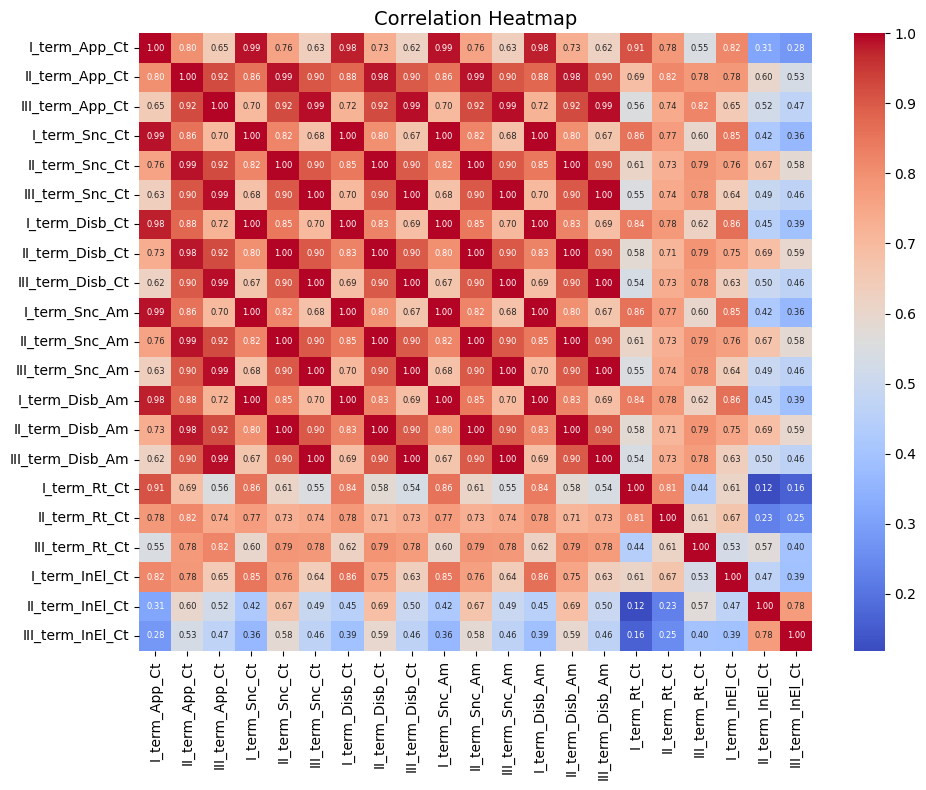

In [20]:
# Step 6: Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Keep two decimal places for correlation values
    cmap='coolwarm',
    cbar=True,
    annot_kws={"size": 6}  # Set font size for annotations (smaller numbers)
)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

Available columns in the dataset:
Index(['stateCode', 'stateName', 'localbodyCode', 'ulbName',
       'firsttermeligibleapplicationcount',
       'secondtermeligibleapplicationcount',
       'thirdtermeligibleapplicationcount', 'firsttermtotalsanctionedcount',
       'secondtermtotalsanctionedcount', 'thirdtermtotalsanctionedcount',
       'firsttermdisbursedcount', 'secondtermdisbursedcount',
       'thirdtermdisbursedcount', 'firsttermsanctionedamount',
       'secondtermsanctionedamount', 'thirdtermsanctionedamount',
       'firsttermdisbursedamount', 'secondtermdisbursedamount',
       'thirdtermdisbursedamount', 'firsttermreturnedcount',
       'secondtermreturnedcount', 'thirdtermreturnedcount',
       'firsttermineligiblecount', 'secondtermineligiblecount',
       'thirdtermineligiblecount'],
      dtype='object')
Random Forest - MSE: 31350674644354.90, R²: 0.98
Linear Regression - MSE: 3020055023989.95, R²: 1.00
Decision Tree - MSE: 55181465844758.81, R²: 0.97

Best Model: Line

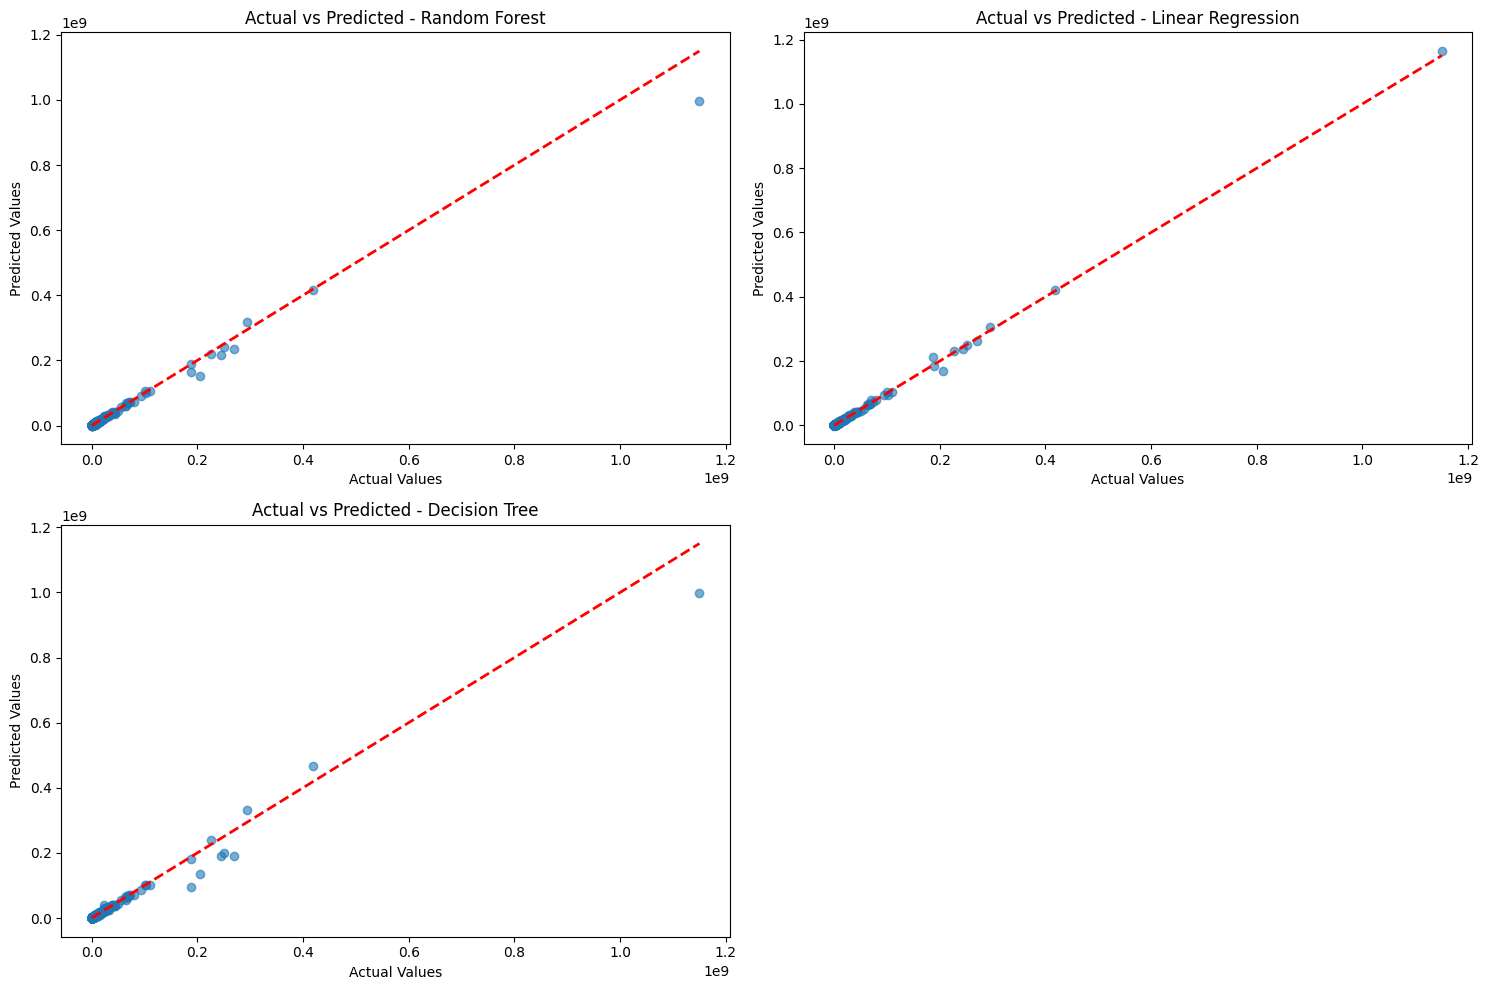


Conclusion:
The Linear Regression model performed best with R²=1.00. Key predictors used were ['firsttermsanctionedamount', 'firsttermtotalsanctionedcount', 'firsttermeligibleapplicationcount', 'firsttermreturnedcount']. These variables were carefully selected based on their theoretical importance in determining disbursed amounts, resulting in a focused and interpretable model.


In [38]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
file_path = '/content/drive/My Drive/assignment_raj.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Step 3: Inspect the column names to check for any typos or missing columns
print("Available columns in the dataset:")
print(data.columns)

# Step 4: Preprocess the data
# Drop non-numeric columns
non_numeric_columns = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
numeric_data = data.drop(columns=non_numeric_columns, errors='ignore')

# Handle missing values (replace NaNs with 0 for simplicity)
numeric_data = numeric_data.fillna(0)

# Step 5: Select top predictors based on theoretical reasoning
# Define the predictors you want to use (ensure they exist in the dataset)
top_predictors = ['firsttermsanctionedamount',
                  'firsttermtotalsanctionedcount',
                  'firsttermeligibleapplicationcount',  # Ensure this column exists
                  'firsttermreturnedcount']

dependent_variable = 'firsttermdisbursedamount'  # Target variable

# Check if the selected predictors and dependent variable exist in the dataset
missing_columns = [col for col in top_predictors + [dependent_variable] if col not in numeric_data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # You can either fix the column names or drop the missing ones from the analysis
    # For now, we will remove the missing ones from the top_predictors list
    top_predictors = [col for col in top_predictors if col in numeric_data.columns]
    print(f"Using the following predictors: {top_predictors}")

# Filter the data for selected columns
required_columns = top_predictors + [dependent_variable]
selected_data = numeric_data[required_columns]

# Step 6: Split the data
X = selected_data[top_predictors]  # Predictors
y = selected_data[dependent_variable]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

# Step 8: Select the best model
best_model_name = min(results, key=lambda x: results[x]["MSE"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Step 9: Scatter plots for actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Step 10: Final conclusion
print("\nConclusion:")
best_r2 = results[best_model_name]["R2"]
print(f"The {best_model_name} model performed best with R²={best_r2:.2f}. "
      f"Key predictors used were {top_predictors}. These variables were carefully selected based on their theoretical "
      "importance in determining disbursed amounts, resulting in a focused and interpretable model.")


Available columns in the dataset:
Index(['stateCode', 'stateName', 'localbodyCode', 'ulbName',
       'firsttermeligibleapplicationcount',
       'secondtermeligibleapplicationcount',
       'thirdtermeligibleapplicationcount', 'firsttermtotalsanctionedcount',
       'secondtermtotalsanctionedcount', 'thirdtermtotalsanctionedcount',
       'firsttermdisbursedcount', 'secondtermdisbursedcount',
       'thirdtermdisbursedcount', 'firsttermsanctionedamount',
       'secondtermsanctionedamount', 'thirdtermsanctionedamount',
       'firsttermdisbursedamount', 'secondtermdisbursedamount',
       'thirdtermdisbursedamount', 'firsttermreturnedcount',
       'secondtermreturnedcount', 'thirdtermreturnedcount',
       'firsttermineligiblecount', 'secondtermineligiblecount',
       'thirdtermineligiblecount'],
      dtype='object')
Data after outlier removal: 4047 rows
Random Forest - MSE: 125461082322.88, RMSE: 354204.86, R²: 0.98, Adjusted R²: 0.98
Linear Regression - MSE: 92875869214.81, RMSE:

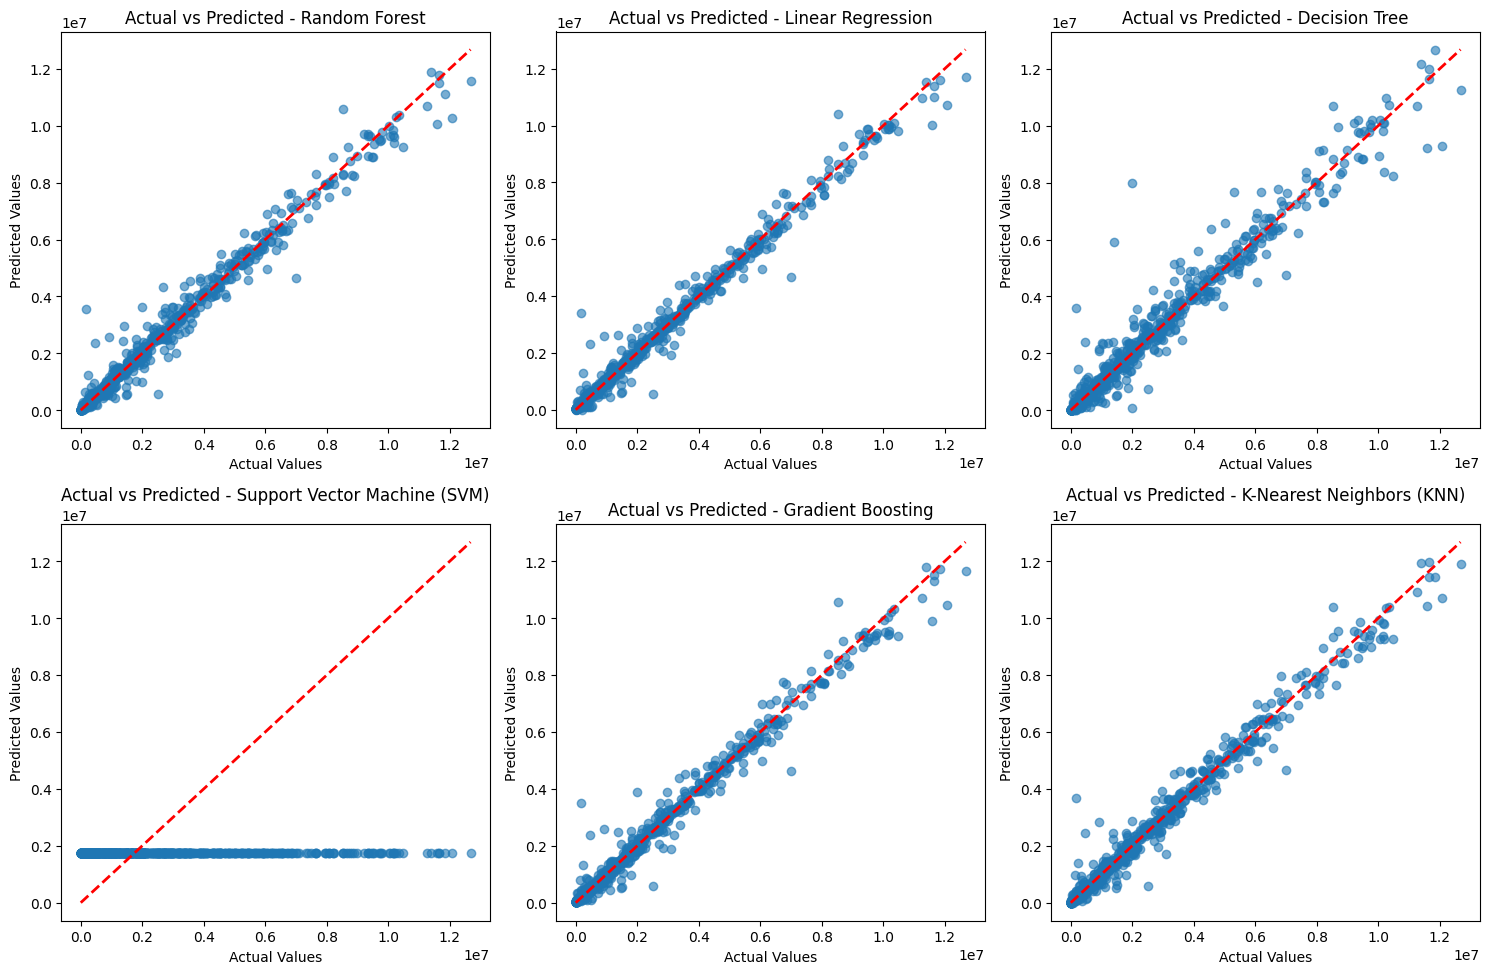


Conclusion:
The Linear Regression model performed best with RMSE=304755.43. Key predictors used were ['firsttermsanctionedamount', 'firsttermtotalsanctionedcount', 'firsttermeligibleapplicationcount', 'firsttermreturnedcount']. These variables were carefully selected based on their theoretical importance in determining disbursed amounts, resulting in a focused and interpretable model.


In [39]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
file_path = '/content/drive/My Drive/assignment_raj.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Step 3: Inspect the column names to check for any typos or missing columns
print("Available columns in the dataset:")
print(data.columns)

# Step 4: Preprocess the data
# Drop non-numeric columns
non_numeric_columns = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
numeric_data = data.drop(columns=non_numeric_columns, errors='ignore')

# Handle missing values (replace NaNs with 0 for simplicity)
numeric_data = numeric_data.fillna(0)

# Step 5: Select top predictors based on theoretical reasoning
top_predictors = ['firsttermsanctionedamount',
                  'firsttermtotalsanctionedcount',
                  'firsttermeligibleapplicationcount',
                  'firsttermreturnedcount']

dependent_variable = 'firsttermdisbursedamount'  # Target variable

# Check if the selected predictors and dependent variable exist in the dataset
missing_columns = [col for col in top_predictors + [dependent_variable] if col not in numeric_data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # For now, we will remove the missing ones from the top_predictors list
    top_predictors = [col for col in top_predictors if col in numeric_data.columns]
    print(f"Using the following predictors: {top_predictors}")

# Filter the data for selected columns
required_columns = top_predictors + [dependent_variable]
selected_data = numeric_data[required_columns]

# Step 6: Remove Outliers using IQR (Interquartile Range)
Q1 = selected_data.quantile(0.25)
Q3 = selected_data.quantile(0.75)
IQR = Q3 - Q1

# Remove rows where values are outside 1.5*IQR range (outliers)
filtered_data = selected_data[~((selected_data < (Q1 - 1.5 * IQR)) | (selected_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Data after outlier removal: {filtered_data.shape[0]} rows")

# Step 7: Split the data into train and test sets
X = filtered_data[top_predictors]  # Predictors
y = filtered_data[dependent_variable]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine (SVM)": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R²
    n = X_test.shape[0]  # Number of data points
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "Adjusted R²": adj_r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Adjusted R²: {adj_r2:.2f}")

# Step 9: Select the best model
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Step 10: Scatter plots for actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Step 11: Final conclusion
print("\nConclusion:")
best_rmse = results[best_model_name]["RMSE"]
print(f"The {best_model_name} model performed best with RMSE={best_rmse:.2f}. "
      f"Key predictors used were {top_predictors}. These variables were carefully selected based on their theoretical "
      "importance in determining disbursed amounts, resulting in a focused and interpretable model.")


Available columns in the dataset:
Index(['stateCode', 'stateName', 'localbodyCode', 'ulbName',
       'firsttermeligibleapplicationcount',
       'secondtermeligibleapplicationcount',
       'thirdtermeligibleapplicationcount', 'firsttermtotalsanctionedcount',
       'secondtermtotalsanctionedcount', 'thirdtermtotalsanctionedcount',
       'firsttermdisbursedcount', 'secondtermdisbursedcount',
       'thirdtermdisbursedcount', 'firsttermsanctionedamount',
       'secondtermsanctionedamount', 'thirdtermsanctionedamount',
       'firsttermdisbursedamount', 'secondtermdisbursedamount',
       'thirdtermdisbursedamount', 'firsttermreturnedcount',
       'secondtermreturnedcount', 'thirdtermreturnedcount',
       'firsttermineligiblecount', 'secondtermineligiblecount',
       'thirdtermineligiblecount'],
      dtype='object')
Random Forest - MSE: 31350674644354.90, RMSE: 5599167.32, R²: 0.98, Adjusted R²: 0.98
Linear Regression - MSE: 3020055023989.95, RMSE: 1737830.55, R²: 1.00, Adjusted R

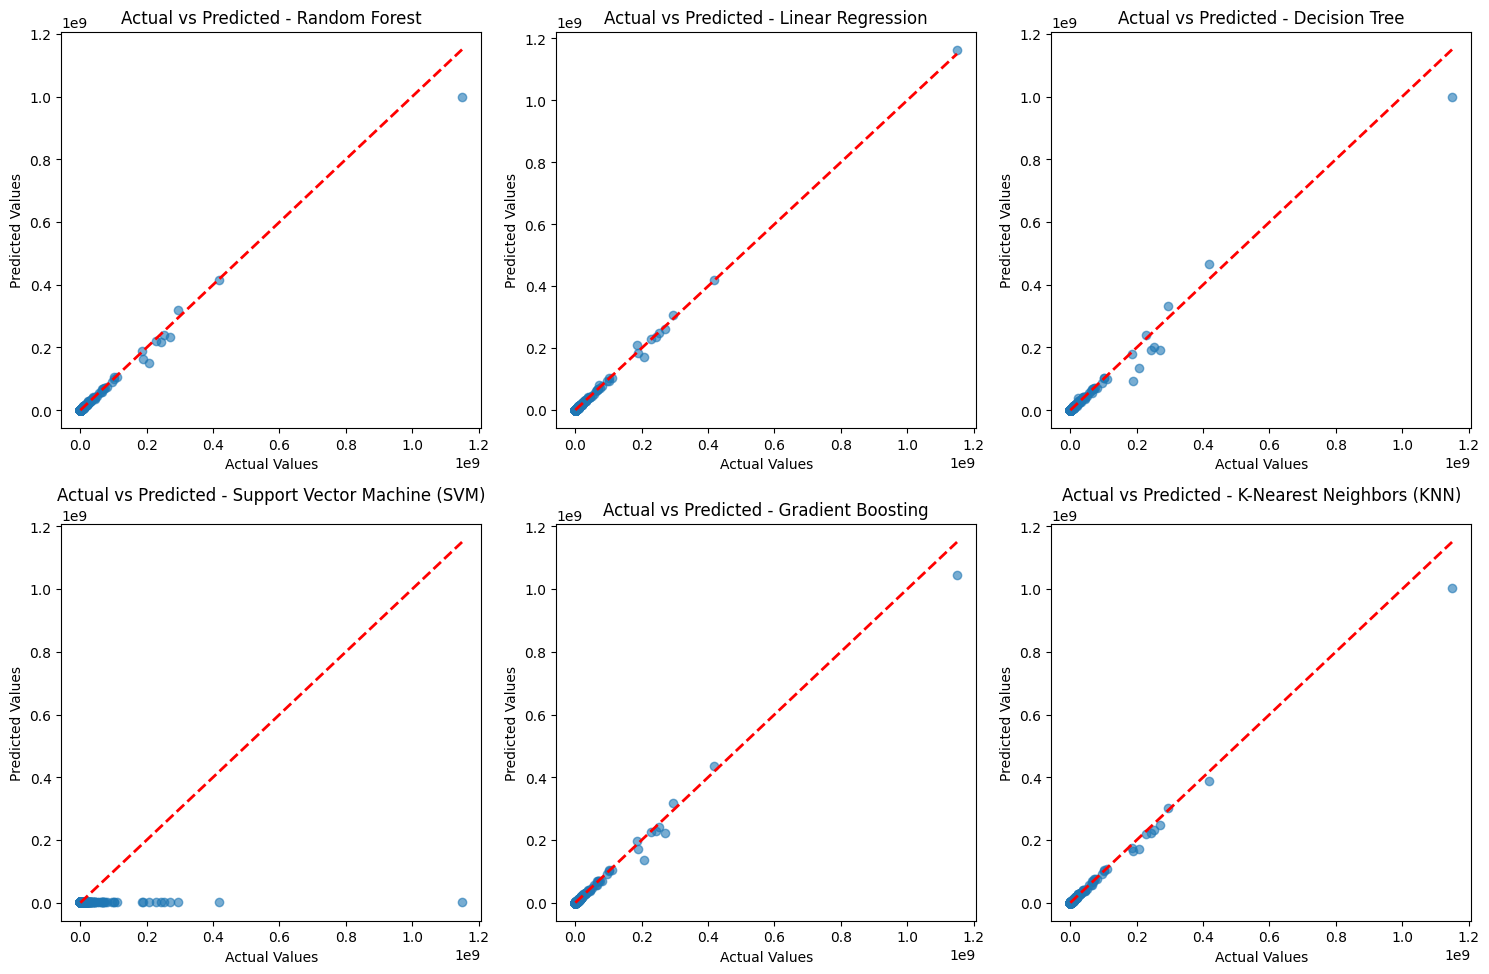


Conclusion:
The Linear Regression model performed best with RMSE=1737830.55. Key predictors used were ['firsttermsanctionedamount', 'firsttermtotalsanctionedcount', 'firsttermeligibleapplicationcount', 'firsttermreturnedcount']. These variables were carefully selected based on their theoretical importance in determining disbursed amounts, resulting in a focused and interpretable model.


In [40]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
file_path = '/content/drive/My Drive/assignment_raj.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Step 3: Inspect the column names to check for any typos or missing columns
print("Available columns in the dataset:")
print(data.columns)

# Step 4: Preprocess the data
# Drop non-numeric columns
non_numeric_columns = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
numeric_data = data.drop(columns=non_numeric_columns, errors='ignore')

# Handle missing values (replace NaNs with 0 for simplicity)
numeric_data = numeric_data.fillna(0)

# Step 5: Select top predictors based on theoretical reasoning
top_predictors = ['firsttermsanctionedamount',
                  'firsttermtotalsanctionedcount',
                  'firsttermeligibleapplicationcount',
                  'firsttermreturnedcount']

dependent_variable = 'firsttermdisbursedamount'  # Target variable

# Check if the selected predictors and dependent variable exist in the dataset
missing_columns = [col for col in top_predictors + [dependent_variable] if col not in numeric_data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # For now, we will remove the missing ones from the top_predictors list
    top_predictors = [col for col in top_predictors if col in numeric_data.columns]
    print(f"Using the following predictors: {top_predictors}")

# Filter the data for selected columns
required_columns = top_predictors + [dependent_variable]
selected_data = numeric_data[required_columns]

# Step 6: Skip outlier removal (as requested)

# Step 7: Split the data into train and test sets
X = selected_data[top_predictors]  # Predictors
y = selected_data[dependent_variable]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine (SVM)": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R²
    n = X_test.shape[0]  # Number of data points
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "Adjusted R²": adj_r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Adjusted R²: {adj_r2:.2f}")

# Step 9: Select the best model
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Step 10: Scatter plots for actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Step 11: Final conclusion
print("\nConclusion:")
best_rmse = results[best_model_name]["RMSE"]
print(f"The {best_model_name} model performed best with RMSE={best_rmse:.2f}. "
      f"Key predictors used were {top_predictors}. These variables were carefully selected based on their theoretical "
      "importance in determining disbursed amounts, resulting in a focused and interpretable model.")


Available columns in the dataset:
Index(['stateCode', 'stateName', 'localbodyCode', 'ulbName',
       'firsttermeligibleapplicationcount',
       'secondtermeligibleapplicationcount',
       'thirdtermeligibleapplicationcount', 'firsttermtotalsanctionedcount',
       'secondtermtotalsanctionedcount', 'thirdtermtotalsanctionedcount',
       'firsttermdisbursedcount', 'secondtermdisbursedcount',
       'thirdtermdisbursedcount', 'firsttermsanctionedamount',
       'secondtermsanctionedamount', 'thirdtermsanctionedamount',
       'firsttermdisbursedamount', 'secondtermdisbursedamount',
       'thirdtermdisbursedamount', 'firsttermreturnedcount',
       'secondtermreturnedcount', 'thirdtermreturnedcount',
       'firsttermineligiblecount', 'secondtermineligiblecount',
       'thirdtermineligiblecount'],
      dtype='object')
Data after outlier removal: 4802 rows
Random Forest - MSE: 2041419043453.49, RMSE: 1428782.36, R²: 0.99, Adjusted R²: 0.99
Linear Regression - MSE: 532944863391.44, RM

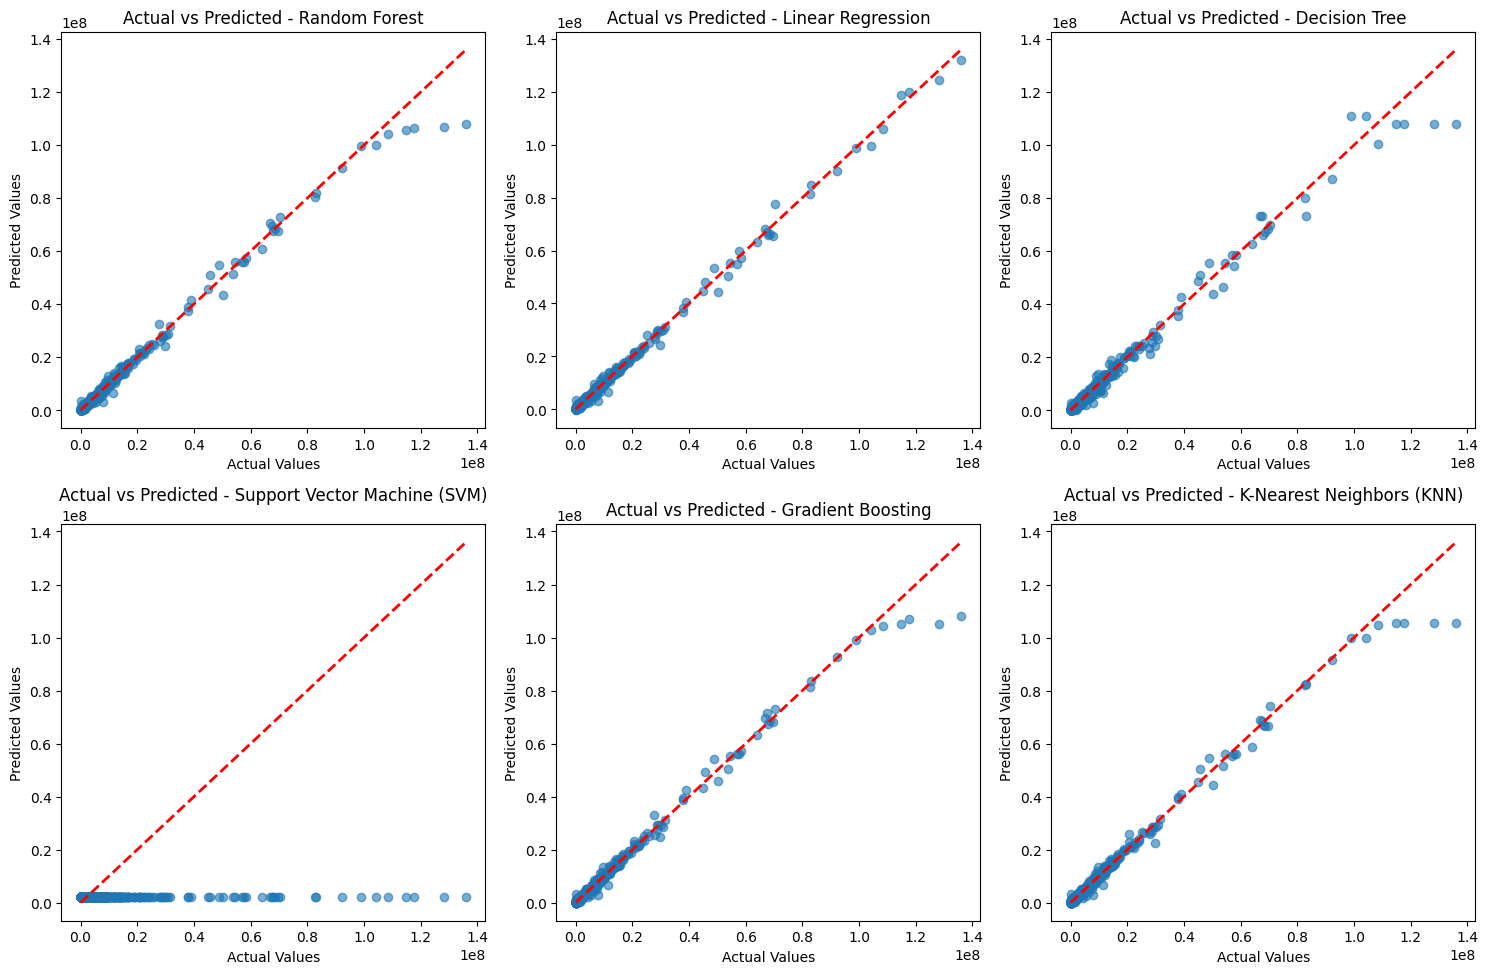


Conclusion:
The Linear Regression model performed best with RMSE=730030.73. Key predictors used were ['firsttermsanctionedamount', 'firsttermtotalsanctionedcount', 'firsttermeligibleapplicationcount', 'firsttermreturnedcount']. These variables were carefully selected based on their theoretical importance in determining disbursed amounts, resulting in a focused and interpretable model.


In [41]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Step 2: Load the data
file_path = '/content/drive/My Drive/assignment_raj.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Step 3: Inspect the column names to check for any typos or missing columns
print("Available columns in the dataset:")
print(data.columns)

# Step 4: Preprocess the data
# Drop non-numeric columns
non_numeric_columns = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
numeric_data = data.drop(columns=non_numeric_columns, errors='ignore')

# Handle missing values (replace NaNs with 0 for simplicity)
numeric_data = numeric_data.fillna(0)

# Step 5: Select top predictors based on theoretical reasoning
top_predictors = ['firsttermsanctionedamount',
                  'firsttermtotalsanctionedcount',
                  'firsttermeligibleapplicationcount',
                  'firsttermreturnedcount']

dependent_variable = 'firsttermdisbursedamount'  # Target variable

# Check if the selected predictors and dependent variable exist in the dataset
missing_columns = [col for col in top_predictors + [dependent_variable] if col not in numeric_data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # For now, we will remove the missing ones from the top_predictors list
    top_predictors = [col for col in top_predictors if col in numeric_data.columns]
    print(f"Using the following predictors: {top_predictors}")

# Filter the data for selected columns
required_columns = top_predictors + [dependent_variable]
selected_data = numeric_data[required_columns]

# Step 6: Remove outliers using Z-score method
z_scores = np.abs(zscore(selected_data[top_predictors]))  # Calculate Z-scores for predictors
threshold = 3  # Define threshold for outlier (commonly 3)
outliers = (z_scores > threshold).any(axis=1)  # Identify rows with outliers in any predictor
filtered_data = selected_data[~outliers]  # Remove outliers

print(f"Data after outlier removal: {filtered_data.shape[0]} rows")

# Step 7: Split the data into train and test sets
X = filtered_data[top_predictors]  # Predictors
y = filtered_data[dependent_variable]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine (SVM)": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R²
    n = X_test.shape[0]  # Number of data points
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "Adjusted R²": adj_r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Adjusted R²: {adj_r2:.2f}")

# Step 9: Select the best model
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Step 10: Scatter plots for actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Step 11: Final conclusion
print("\nConclusion:")
best_rmse = results[best_model_name]["RMSE"]
print(f"The {best_model_name} model performed best with RMSE={best_rmse:.2f}. "
      f"Key predictors used were {top_predictors}. These variables were carefully selected based on their theoretical "
      "importance in determining disbursed amounts, resulting in a focused and interpretable model.")


Available columns in the dataset:
Index(['stateCode', 'stateName', 'localbodyCode', 'ulbName',
       'firsttermeligibleapplicationcount',
       'secondtermeligibleapplicationcount',
       'thirdtermeligibleapplicationcount', 'firsttermtotalsanctionedcount',
       'secondtermtotalsanctionedcount', 'thirdtermtotalsanctionedcount',
       'firsttermdisbursedcount', 'secondtermdisbursedcount',
       'thirdtermdisbursedcount', 'firsttermsanctionedamount',
       'secondtermsanctionedamount', 'thirdtermsanctionedamount',
       'firsttermdisbursedamount', 'secondtermdisbursedamount',
       'thirdtermdisbursedamount', 'firsttermreturnedcount',
       'secondtermreturnedcount', 'thirdtermreturnedcount',
       'firsttermineligiblecount', 'secondtermineligiblecount',
       'thirdtermineligiblecount'],
      dtype='object')
Data after outlier removal: 4838 rows
Random Forest - MSE: 2702876651919.26, RMSE: 1644042.78, R²: 0.99, Adjusted R²: 0.99
Linear Regression - MSE: 302535627440.22, RM

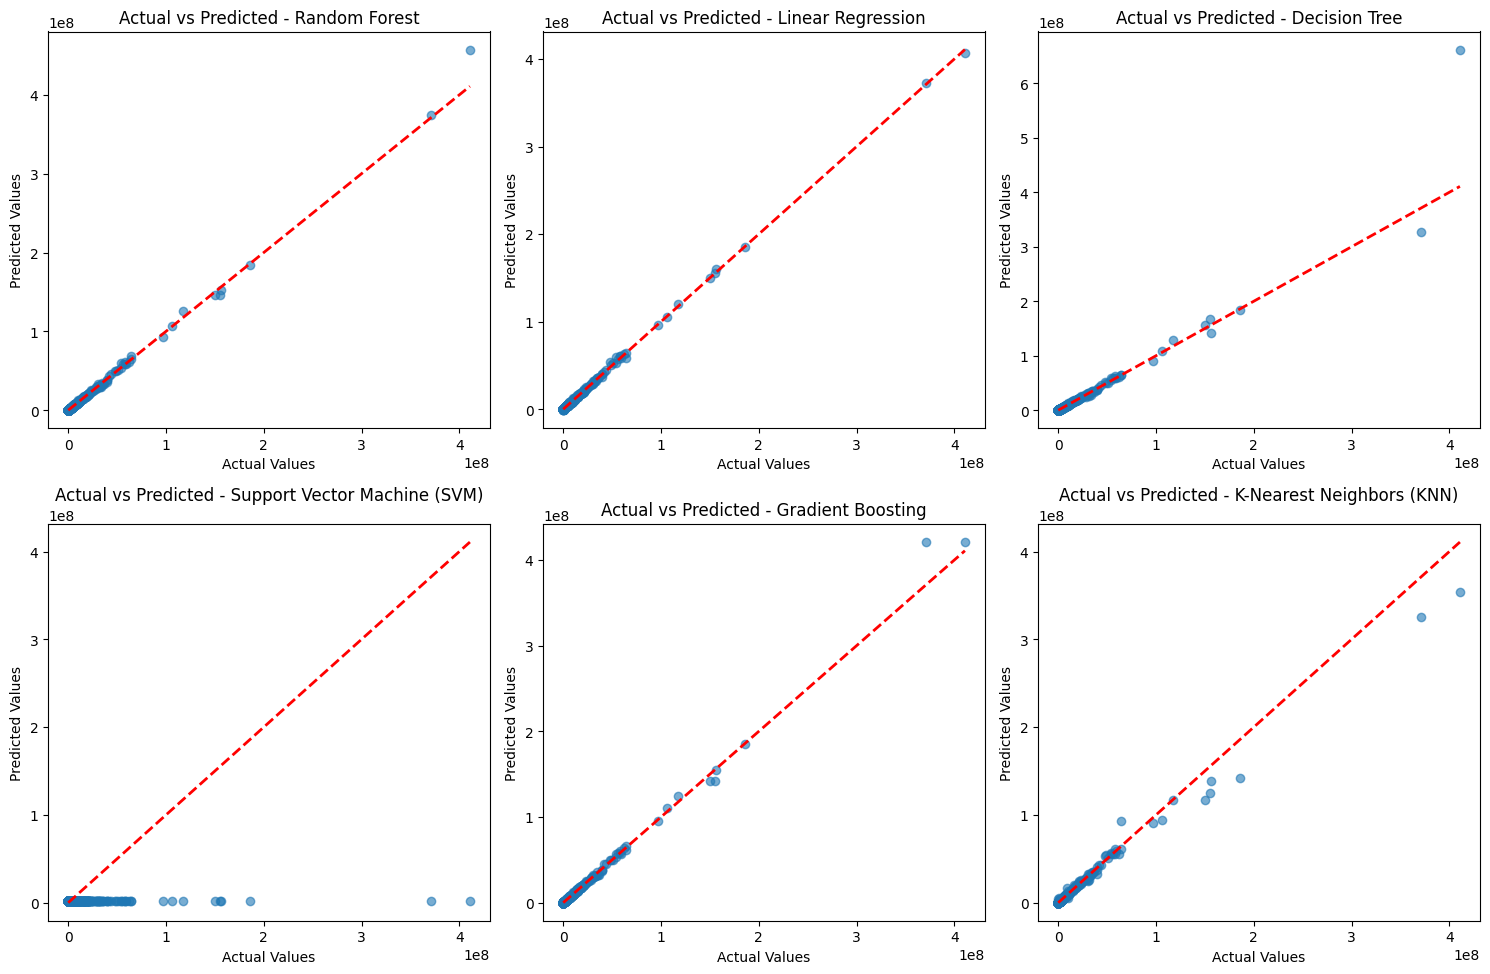


Conclusion:
The Linear Regression model performed best with RMSE=550032.39. Key predictors used were ['firsttermsanctionedamount', 'firsttermtotalsanctionedcount', 'firsttermeligibleapplicationcount', 'firsttermreturnedcount', 'secondtermsanctionedamount', 'secondtermtotalsanctionedcount', 'secondtermeligibleapplicationcount', 'secondtermreturnedcount']. These variables were carefully selected based on their theoretical importance in determining disbursed amounts, resulting in a focused and interpretable model.


In [46]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Step 2: Load the data
file_path = '/content/drive/My Drive/assignment_raj.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Step 3: Inspect the column names to check for any typos or missing columns
print("Available columns in the dataset:")
print(data.columns)

# Step 4: Preprocess the data
# Drop non-numeric columns
non_numeric_columns = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
numeric_data = data.drop(columns=non_numeric_columns, errors='ignore')

# Handle missing values (replace NaNs with 0 for simplicity)
numeric_data = numeric_data.fillna(0)

# Step 5: Select top predictors based on theoretical reasoning
top_predictors = ['firsttermsanctionedamount',
                  'firsttermtotalsanctionedcount',
                  'firsttermeligibleapplicationcount',
                  'firsttermreturnedcount', 'secondtermsanctionedamount', 'secondtermtotalsanctionedcount','secondtermeligibleapplicationcount', 'secondtermreturnedcount' ]

# Dependent variable is now 'secondtermdisbursedamount' as per your update
dependent_variable = 'secondtermdisbursedamount'  # Target variable

# Check if the selected predictors and dependent variable exist in the dataset
missing_columns = [col for col in top_predictors + [dependent_variable] if col not in numeric_data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # For now, we will remove the missing ones from the top_predictors list
    top_predictors = [col for col in top_predictors if col in numeric_data.columns]
    print(f"Using the following predictors: {top_predictors}")

# Filter the data for selected columns
required_columns = top_predictors + [dependent_variable]
selected_data = numeric_data[required_columns]

# Step 6: Outlier Removal using Z-Score
z_scores = np.abs(zscore(selected_data))
outliers = (z_scores > 3).all(axis=1)  # Mark rows as outliers if all values are > 3 standard deviations
filtered_data = selected_data[~outliers]

print(f"Data after outlier removal: {filtered_data.shape[0]} rows")

# Step 7: Split the data into train and test sets
X = filtered_data[top_predictors]  # Predictors
y = filtered_data[dependent_variable]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine (SVM)": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R²
    n = X_test.shape[0]  # Number of data points
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "Adjusted R²": adj_r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Adjusted R²: {adj_r2:.2f}")

# Step 9: Select the best model
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Step 10: Scatter plots for actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Step 11: Final conclusion
print("\nConclusion:")
best_rmse = results[best_model_name]["RMSE"]
print(f"The {best_model_name} model performed best with RMSE={best_rmse:.2f}. "
      f"Key predictors used were {top_predictors}. These variables were carefully selected based on their theoretical "
      "importance in determining disbursed amounts, resulting in a focused and interpretable model.")


Available columns in the dataset:
Index(['stateCode', 'stateName', 'localbodyCode', 'ulbName',
       'firsttermeligibleapplicationcount',
       'secondtermeligibleapplicationcount',
       'thirdtermeligibleapplicationcount', 'firsttermtotalsanctionedcount',
       'secondtermtotalsanctionedcount', 'thirdtermtotalsanctionedcount',
       'firsttermdisbursedcount', 'secondtermdisbursedcount',
       'thirdtermdisbursedcount', 'firsttermsanctionedamount',
       'secondtermsanctionedamount', 'thirdtermsanctionedamount',
       'firsttermdisbursedamount', 'secondtermdisbursedamount',
       'thirdtermdisbursedamount', 'firsttermreturnedcount',
       'secondtermreturnedcount', 'thirdtermreturnedcount',
       'firsttermineligiblecount', 'secondtermineligiblecount',
       'thirdtermineligiblecount'],
      dtype='object')
Data after outlier removal: 3774 rows
Random Forest - MSE: 35326629019.36, RMSE: 187953.79, R²: 0.99, Adjusted R²: 0.99
Linear Regression - MSE: 31780754402.78, RMSE: 

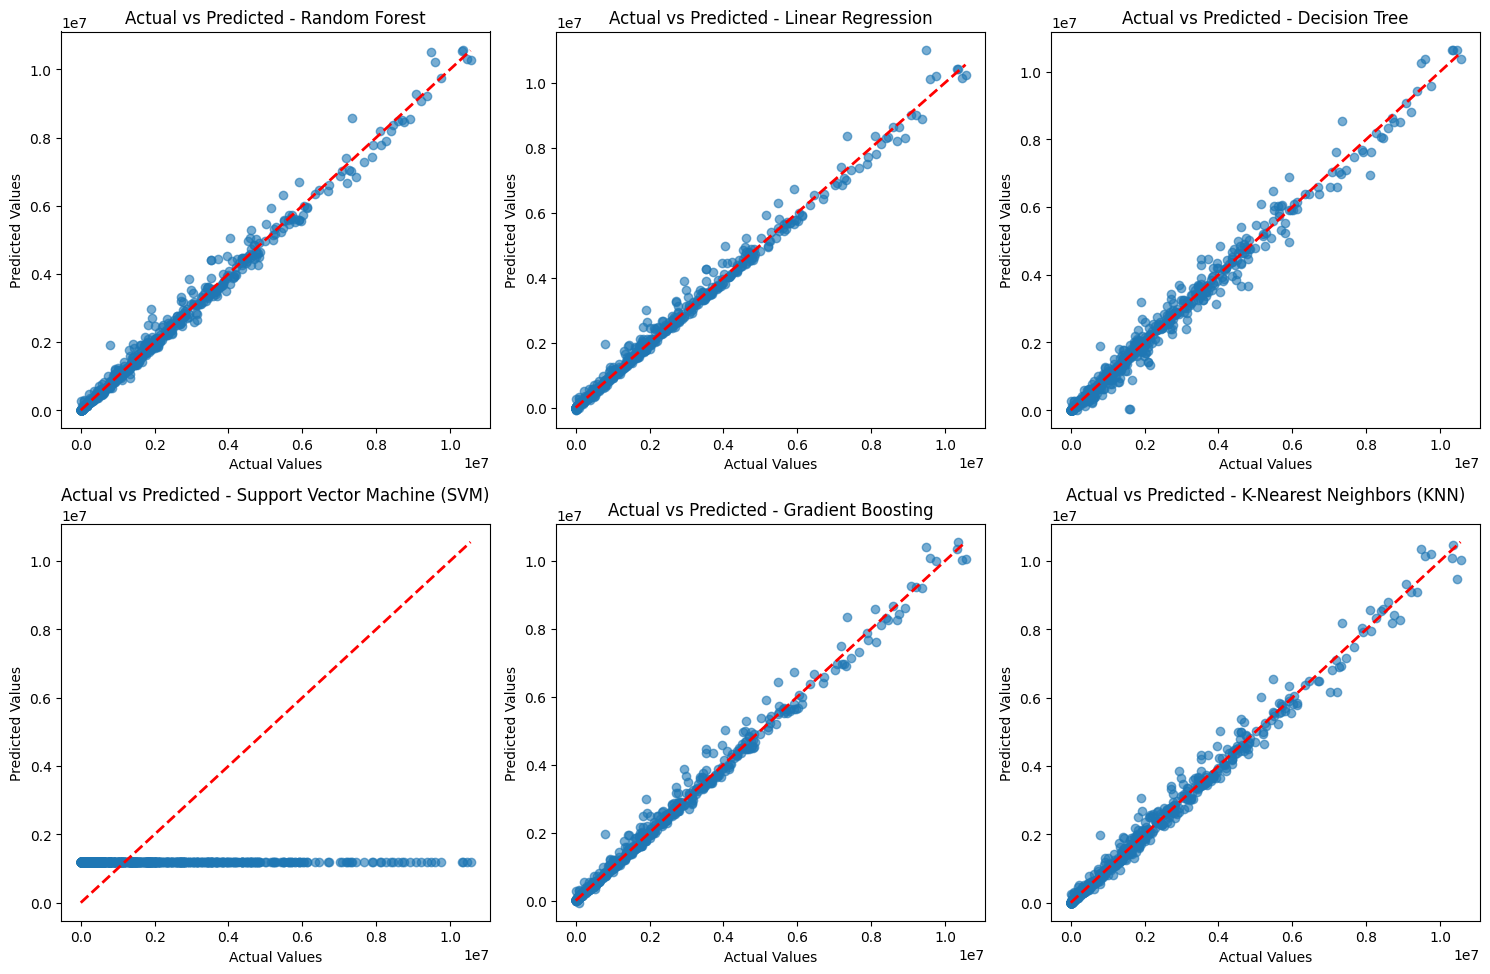


Conclusion:
The Linear Regression model performed best with RMSE=178271.57. Key predictors used were ['firsttermsanctionedamount', 'firsttermtotalsanctionedcount', 'firsttermeligibleapplicationcount', 'firsttermreturnedcount', 'secondtermsanctionedamount', 'secondtermtotalsanctionedcount', 'secondtermeligibleapplicationcount', 'secondtermreturnedcount']. These variables were carefully selected based on their theoretical importance in determining disbursed amounts, resulting in a focused and interpretable model.


In [45]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
file_path = '/content/drive/My Drive/assignment_raj.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Step 3: Inspect the column names to check for any typos or missing columns
print("Available columns in the dataset:")
print(data.columns)

# Step 4: Preprocess the data
# Drop non-numeric columns
non_numeric_columns = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
numeric_data = data.drop(columns=non_numeric_columns, errors='ignore')

# Handle missing values (replace NaNs with 0 for simplicity)
numeric_data = numeric_data.fillna(0)

# Step 5: Select top predictors based on theoretical reasoning
top_predictors = ['firsttermsanctionedamount',
                  'firsttermtotalsanctionedcount',
                  'firsttermeligibleapplicationcount',
                  'firsttermreturnedcount',
                  'secondtermsanctionedamount',
                  'secondtermtotalsanctionedcount',
                  'secondtermeligibleapplicationcount',
                  'secondtermreturnedcount']

# Dependent variable is now 'secondtermdisbursedamount' as per your update
dependent_variable = 'secondtermdisbursedamount'  # Target variable

# Check if the selected predictors and dependent variable exist in the dataset
missing_columns = [col for col in top_predictors + [dependent_variable] if col not in numeric_data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # For now, we will remove the missing ones from the top_predictors list
    top_predictors = [col for col in top_predictors if col in numeric_data.columns]
    print(f"Using the following predictors: {top_predictors}")

# Filter the data for selected columns
required_columns = top_predictors + [dependent_variable]
selected_data = numeric_data[required_columns]

# Step 6: Outlier Removal using IQR (Interquartile Range) method
Q1 = selected_data.quantile(0.25)  # First quartile (25th percentile)
Q3 = selected_data.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the acceptable range for each variable (1.5*IQR below Q1 and above Q3)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where values are outside the IQR bounds
filtered_data = selected_data[~((selected_data < lower_bound) | (selected_data > upper_bound)).any(axis=1)]

print(f"Data after outlier removal: {filtered_data.shape[0]} rows")

# Step 7: Split the data into train and test sets
X = filtered_data[top_predictors]  # Predictors
y = filtered_data[dependent_variable]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine (SVM)": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R²
    n = X_test.shape[0]  # Number of data points
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "Adjusted R²": adj_r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Adjusted R²: {adj_r2:.2f}")

# Step 9: Select the best model
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Step 10: Scatter plots for actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Step 11: Final conclusion
print("\nConclusion:")
best_rmse = results[best_model_name]["RMSE"]
print(f"The {best_model_name} model performed best with RMSE={best_rmse:.2f}. "
      f"Key predictors used were {top_predictors}. These variables were carefully selected based on their theoretical "
      "importance in determining disbursed amounts, resulting in a focused and interpretable model.")


Available columns in the dataset:
Index(['stateCode', 'stateName', 'localbodyCode', 'ulbName',
       'firsttermeligibleapplicationcount',
       'secondtermeligibleapplicationcount',
       'thirdtermeligibleapplicationcount', 'firsttermtotalsanctionedcount',
       'secondtermtotalsanctionedcount', 'thirdtermtotalsanctionedcount',
       'firsttermdisbursedcount', 'secondtermdisbursedcount',
       'thirdtermdisbursedcount', 'firsttermsanctionedamount',
       'secondtermsanctionedamount', 'thirdtermsanctionedamount',
       'firsttermdisbursedamount', 'secondtermdisbursedamount',
       'thirdtermdisbursedamount', 'firsttermreturnedcount',
       'secondtermreturnedcount', 'thirdtermreturnedcount',
       'firsttermineligiblecount', 'secondtermineligiblecount',
       'thirdtermineligiblecount'],
      dtype='object')
Data after outlier removal: 3773 rows
Random Forest - MSE: 14052540491.44, RMSE: 118543.41, R²: 0.98, Adjusted R²: 0.98
Linear Regression - MSE: 10730173571.86, RMSE: 

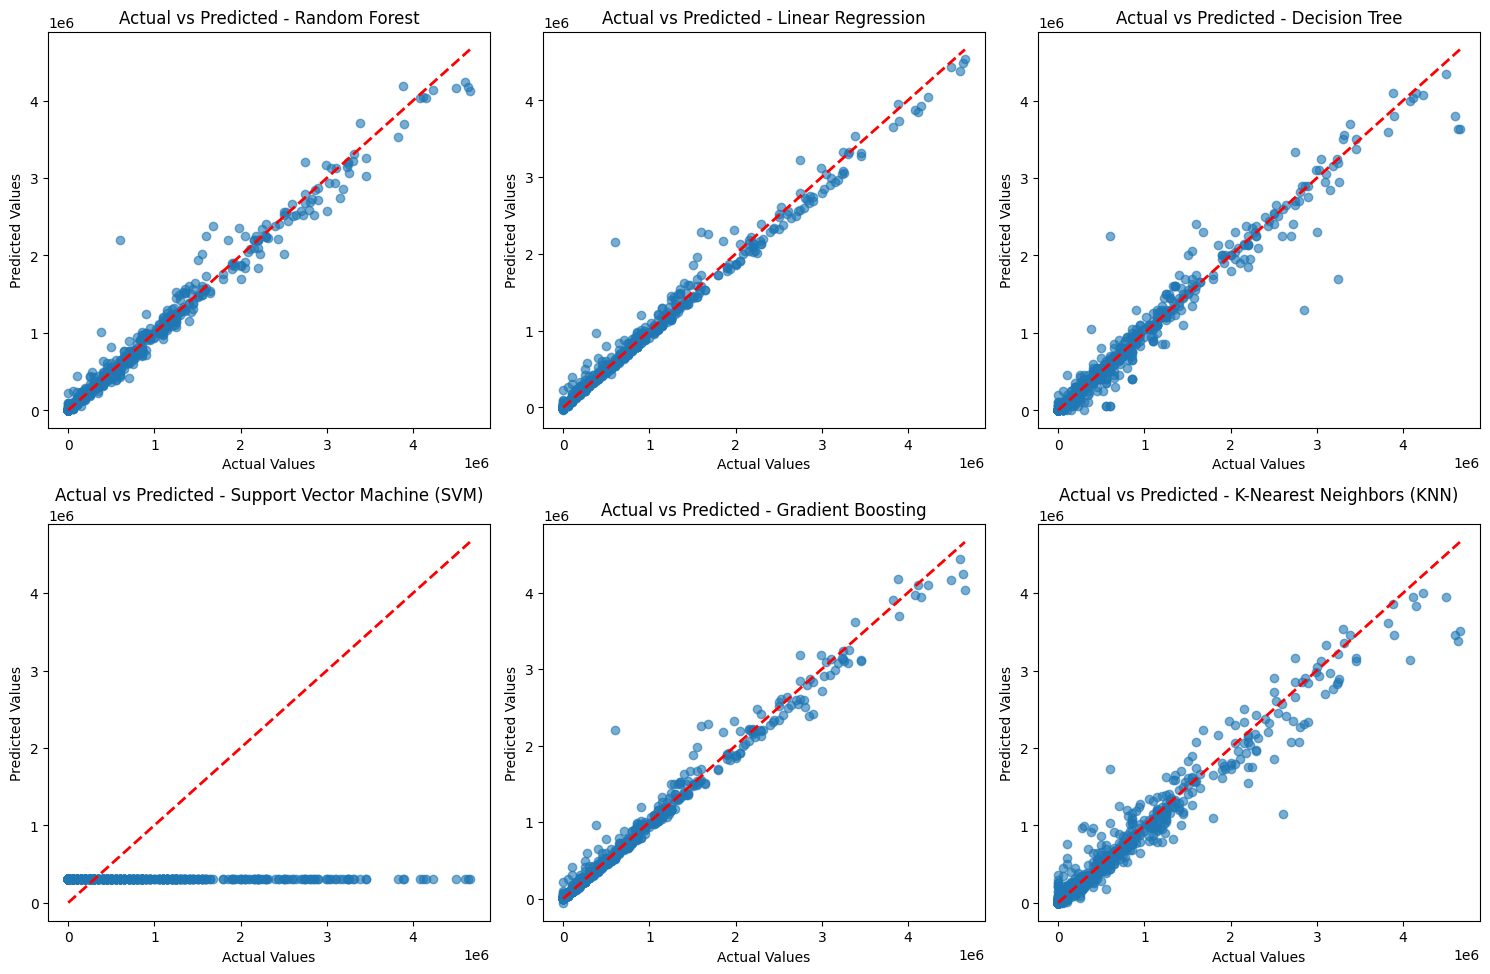


Conclusion:
The Linear Regression model performed best with RMSE=103586.55. Key predictors used were ['firsttermsanctionedamount', 'firsttermtotalsanctionedcount', 'firsttermeligibleapplicationcount', 'firsttermreturnedcount', 'secondtermsanctionedamount', 'secondtermtotalsanctionedcount', 'secondtermeligibleapplicationcount', 'firsttermreturnedcount', 'firsttermreturnedcount', 'thirdtermsanctionedamount', 'thirdtermtotalsanctionedcount', 'thirdtermeligibleapplicationcount']. These variables were carefully selected based on their theoretical importance in determining disbursed amounts, resulting in a focused and interpretable model.


In [47]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
file_path = '/content/drive/My Drive/assignment_raj.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Step 3: Inspect the column names to check for any typos or missing columns
print("Available columns in the dataset:")
print(data.columns)

# Step 4: Preprocess the data
# Drop non-numeric columns
non_numeric_columns = ['stateCode', 'stateName', 'localbodyCode', 'ulbName']
numeric_data = data.drop(columns=non_numeric_columns, errors='ignore')

# Handle missing values (replace NaNs with 0 for simplicity)
numeric_data = numeric_data.fillna(0)

# Step 5: Select top predictors based on theoretical reasoning
top_predictors = ['firsttermsanctionedamount',
                  'firsttermtotalsanctionedcount',
                  'firsttermeligibleapplicationcount',
                  'firsttermreturnedcount',
                  'secondtermsanctionedamount',
                  'secondtermtotalsanctionedcount',
                  'secondtermeligibleapplicationcount', 'firsttermreturnedcount',
                  'firsttermreturnedcount','thirdtermsanctionedamount',
                  'thirdtermtotalsanctionedcount',
                  'thirdtermeligibleapplicationcount',
                  ]

# Dependent variable is now 'secondtermdisbursedamount' as per your update
dependent_variable = 'thirdtermdisbursedamount'  # Target variable

# Check if the selected predictors and dependent variable exist in the dataset
missing_columns = [col for col in top_predictors + [dependent_variable] if col not in numeric_data.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # For now, we will remove the missing ones from the top_predictors list
    top_predictors = [col for col in top_predictors if col in numeric_data.columns]
    print(f"Using the following predictors: {top_predictors}")

# Filter the data for selected columns
required_columns = top_predictors + [dependent_variable]
selected_data = numeric_data[required_columns]

# Step 6: Outlier Removal using IQR (Interquartile Range) method
Q1 = selected_data.quantile(0.25)  # First quartile (25th percentile)
Q3 = selected_data.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the acceptable range for each variable (1.5*IQR below Q1 and above Q3)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where values are outside the IQR bounds
filtered_data = selected_data[~((selected_data < lower_bound) | (selected_data > upper_bound)).any(axis=1)]

print(f"Data after outlier removal: {filtered_data.shape[0]} rows")

# Step 7: Split the data into train and test sets
X = filtered_data[top_predictors]  # Predictors
y = filtered_data[dependent_variable]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train multiple models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine (SVM)": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R²
    n = X_test.shape[0]  # Number of data points
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2, "Adjusted R²": adj_r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Adjusted R²: {adj_r2:.2f}")

# Step 9: Select the best model
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Step 10: Scatter plots for actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Step 11: Final conclusion
print("\nConclusion:")
best_rmse = results[best_model_name]["RMSE"]
print(f"The {best_model_name} model performed best with RMSE={best_rmse:.2f}. "
      f"Key predictors used were {top_predictors}. These variables were carefully selected based on their theoretical "
      "importance in determining disbursed amounts, resulting in a focused and interpretable model.")
